In [2]:
import PIL
import matplotlib.pyplot as plt

In [4]:
conda install tensorflow

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ARJUN\anaconda3

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2022.10  |           py39_2          68 KB
    _tflow_select-2.3.0        |              mkl           3 KB
    abseil-cpp-20211102.0      |       hd77b12b_0         1.7 MB
    absl-py-2.1.0              |   py39haa95532_0         191 KB
    aiohttp-3.9.3              |   py39h2bbff1b_0         660 KB
    aiosignal-1.2.0            |     pyhd3eb1b0_0          12 KB
    anaconda-custom            |           py39_2          13 KB
    astunparse-1.6.3     


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2022.10=py39_0
  - defaults/win-64::anaconda-client==1.11.0=py39haa95532_0
  - defaults/win-64::anaconda-navigator==2.3.1=py39haa95532_0
  - defaults/win-64::anaconda-project==0.11.1=py39haa95532_0
  - defaults/noarch::argon2-cffi==21.3.0=pyhd3eb1b0_0
  - defaults/noarch::arrow==1.2.2=pyhd3eb1b0_0
  - defaults/win-64::astroid==2.11.7=py39haa95532_0
  - defaults/win-64::black==22.6.0=py39haa95532_0
  - defaults/win-64::bokeh==2.4.3=py39haa95532_0
  - defaults/win-64::click==8.0.4=py39haa95532_0
  - defaults/win-64::conda==22.9.0=py39haa95532_0
  - defaults/win-64::conda-build==3.22.0=py39haa95532_0
  - defaults/win-64::conda-package-handling==1.9.0=py39h8cc25b3_0
  - defaults/win-64::conda-repo-cli==1.0.20=py39haa95532_0
  - defaults/noarch::conda-token==0.4.0=pyhd3eb1b0_0
  - defaults/noarch::conda-verify==3.4.2=py_1
  - default

In [1]:
import tensorflow as tf

In [3]:
image= PIL.Image.open(r'E:\chest_xray\chest_xray\train\PNEUMONIA\person1321_virus_2279.jpeg')

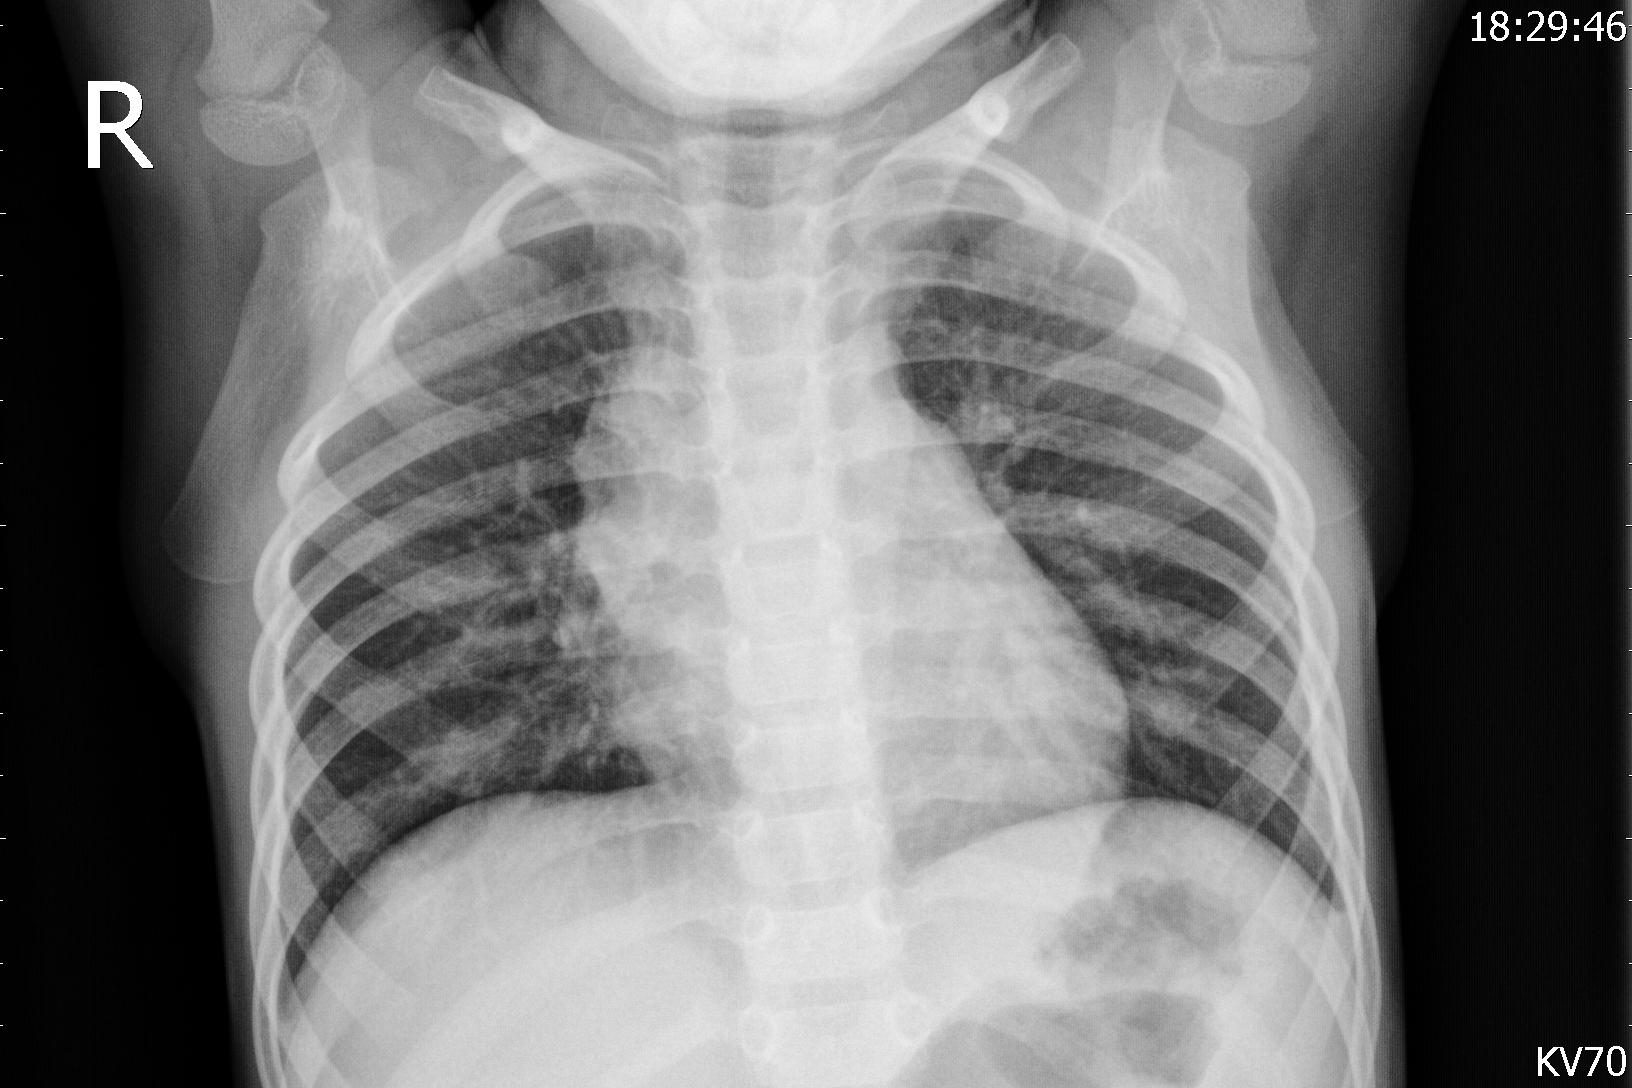

In [4]:
image

In [5]:
image_normal=PIL.Image.open(r'E:\chest_xray\chest_xray\train\NORMAL\IM-0145-0001.jpeg')

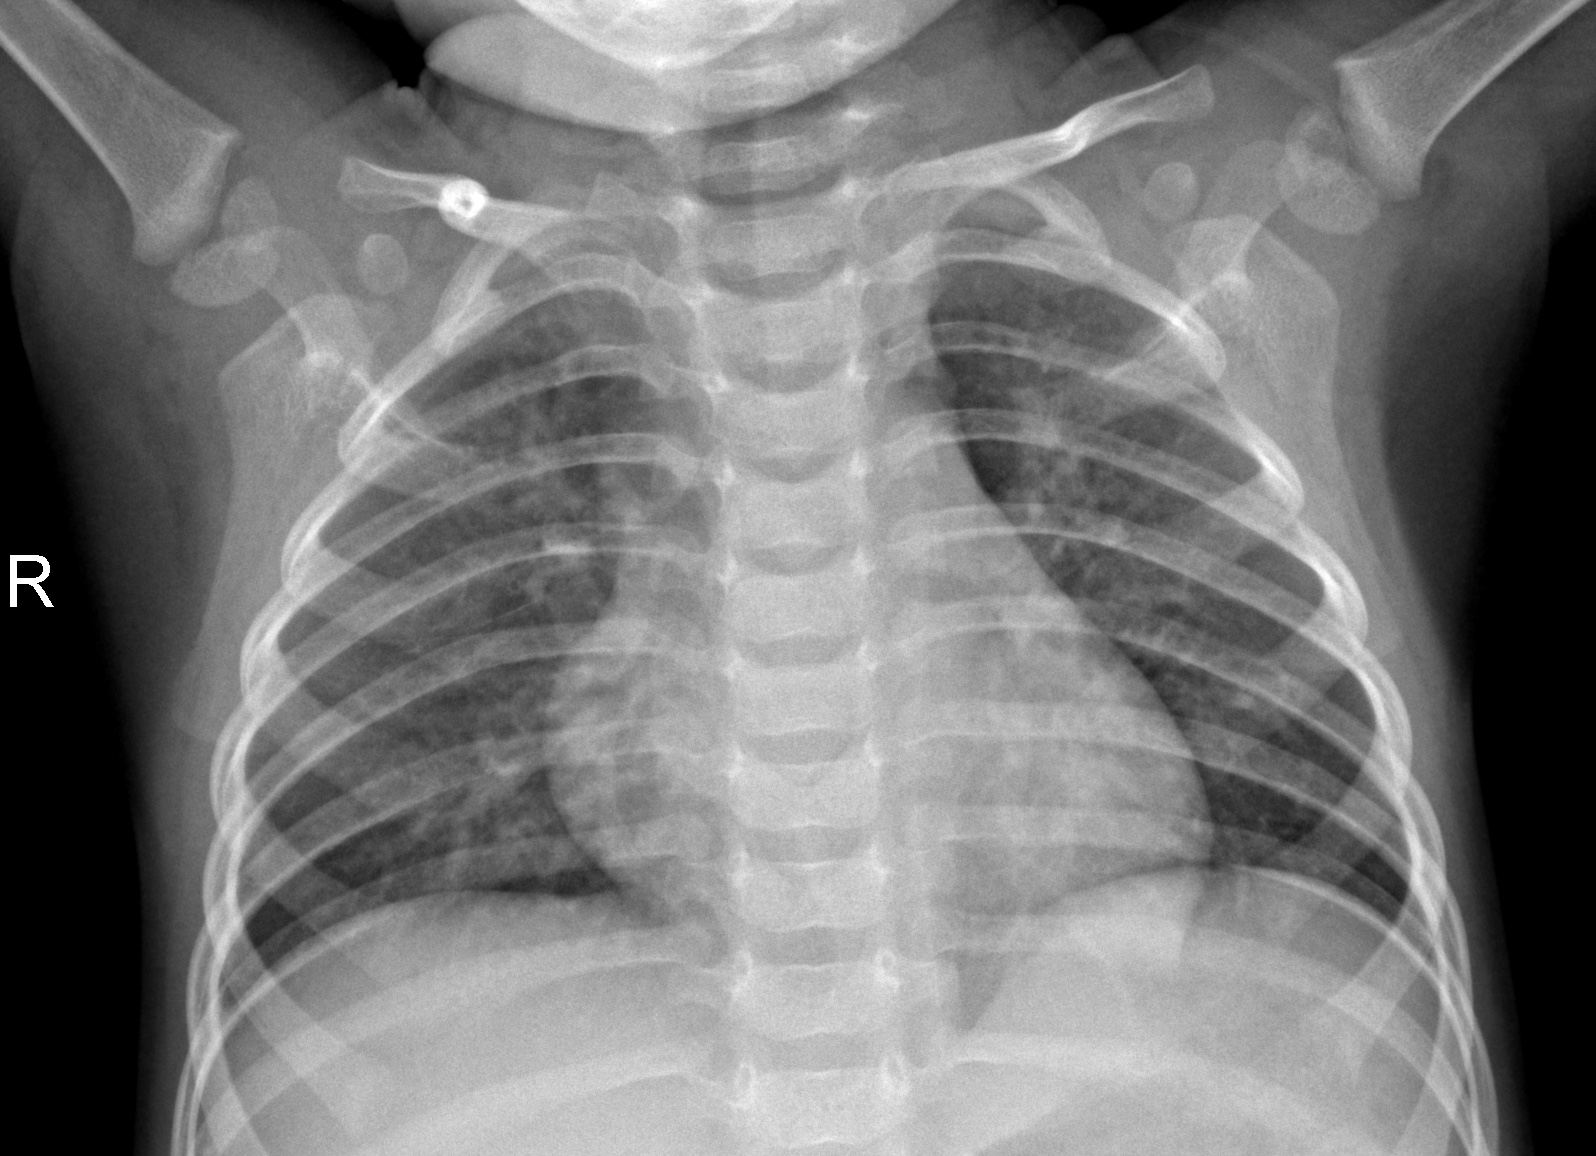

In [6]:
image_normal

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_dir= "E:/chest_xray/chest_xray/train/"
train_generator= ImageDataGenerator(rescale=1/255)
data_train= train_generator.flow_from_directory(train_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 5216 images belonging to 2 classes.


In [9]:
valid_dir= "E:/chest_xray/chest_xray/val/"
valid_generator= ImageDataGenerator(rescale=1/255)
data_valid=valid_generator.flow_from_directory(valid_dir,target_size=(120,120), batch_size=8, class_mode='binary')

Found 16 images belonging to 2 classes.


In [10]:
test_dir="E:/chest_xray/chest_xray/test/"
test_generator= ImageDataGenerator(rescale=1/255)
data_test=test_generator.flow_from_directory(test_dir, target_size=(120,120), batch_size=8, class_mode='binary')

Found 624 images belonging to 2 classes.



# CNN

In [11]:
 model= tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3), input_shape=(120,120,3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(512,(3,3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(256, activation='relu'),
                            tf.keras.layers.Dense(1,activation="sigmoid")])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=["acc"])

In [14]:
history= model.fit_generator(data_train, epochs=2, validation_data=data_valid)

C:\Users\ARJUN\AppData\Local\Temp\ipykernel_13760\2884519914.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(data_train, epochs=2, validation_data=data_valid)


Epoch 1/2
652/652 [==============================] - 90s 135ms/step - loss: 0.5269 - acc: 0.7680 - val_loss: 0.6791 - val_acc: 0.7500
Epoch 2/2
652/652 [==============================] - 85s 131ms/step - loss: 0.2104 - acc: 0.9168 - val_loss: 0.5098 - val_acc: 0.8750


In [24]:
history

In [15]:
model.evaluate(data_test)

78/78 [==============================] - 9s 111ms/step - loss: 0.8356 - acc: 0.7596


[0.835637092590332, 0.7596153616905212]

In [16]:
predictions=model.predict(data_test)


78/78 [==============================] - 8s 102ms/step


In [17]:
predictions[5]

array([0.47273186], dtype=float32)

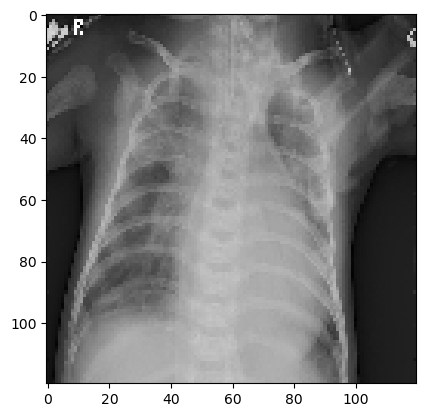

The probabaility of pneumonia is:  [0.18396102]


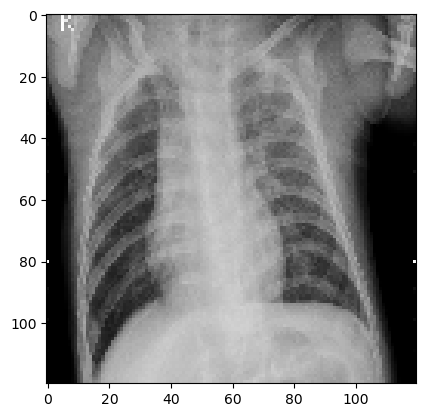

The probabaility of pneumonia is:  [0.05761782]


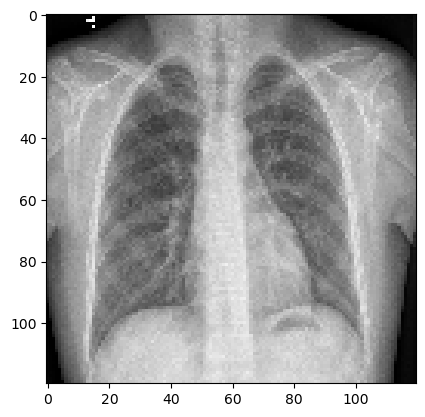

The probabaility of pneumonia is:  [0.89502]


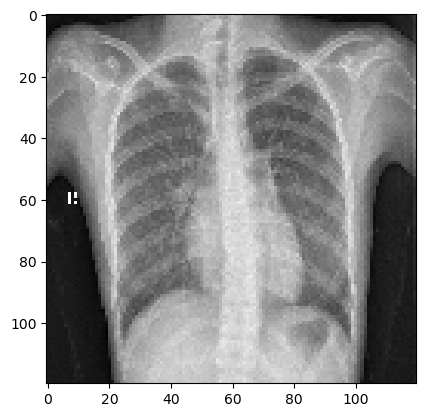

The probabaility of pneumonia is:  [0.9909815]


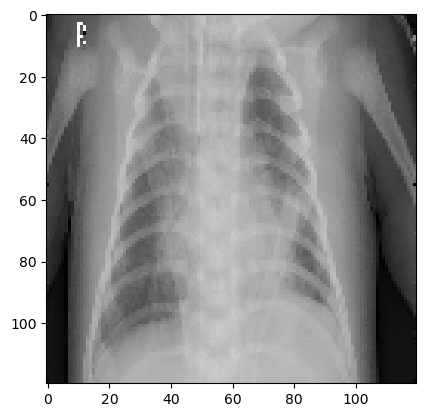

The probabaility of pneumonia is:  [0.99989456]


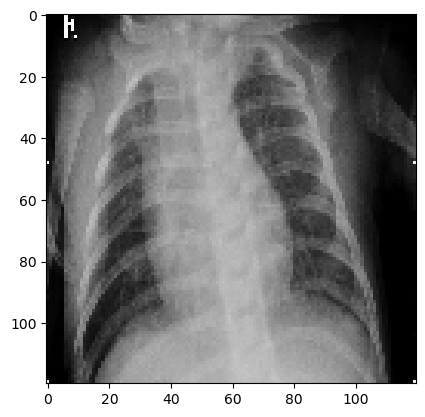

The probabaility of pneumonia is:  [0.47273186]


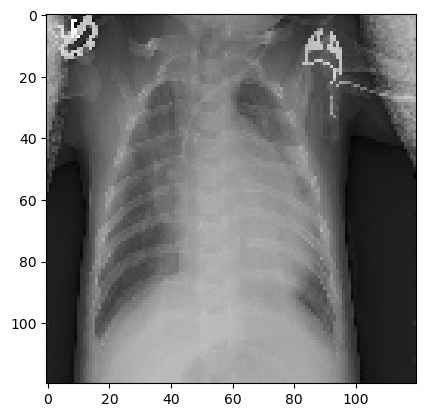

The probabaility of pneumonia is:  [0.9999644]


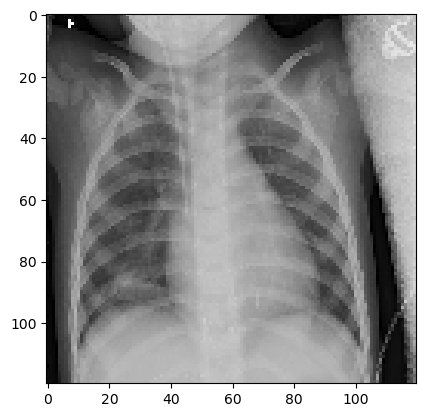

The probabaility of pneumonia is:  [0.9998154]


In [18]:
import matplotlib.pyplot as plt
x=data_test.next() 
for i in range(0,1):
    image=x[i]
    for j in range(0,8):
        plt.imshow(image[j])
        plt.show()
        print("The probabaility of pneumonia is: ", predictions[j])

In [19]:
tf.keras.metrics.Accuracy(
    name='predictions[j]', dtype=None

)

In [25]:
#Plotting the training and validation accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['Accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


KeyError: 'Accuracy'